In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import mahotas as mt
%matplotlib notebook

# Basic Pre-Processing

### Importing

In [78]:
path = "C:\\Users\\suhas\\Documents\\Mini Project\\Leaves\\1048.jpg"

<IPython.core.display.Javascript object>


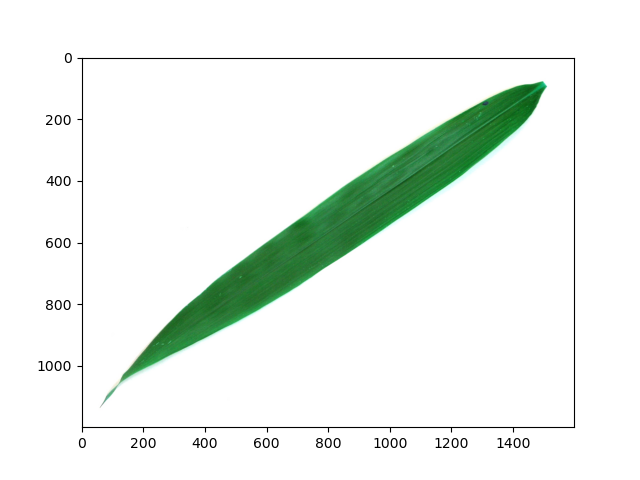

In [79]:
img = cv2.imread(path)
plt.imshow(img)

### Grayscale

<IPython.core.display.Javascript object>


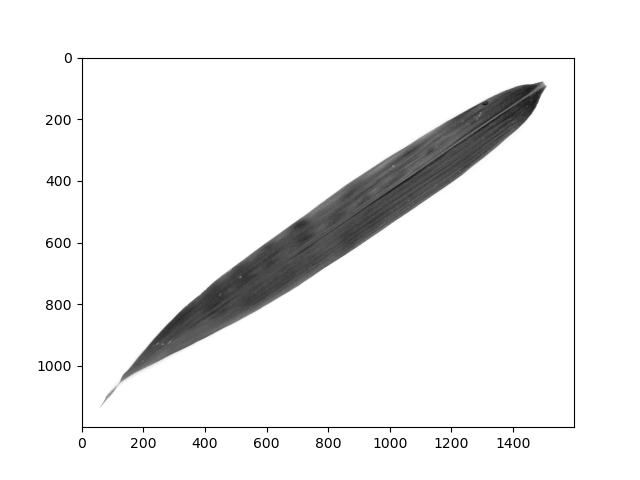

In [80]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imgGray, cmap='Greys_r')

### Applying Blur

<IPython.core.display.Javascript object>


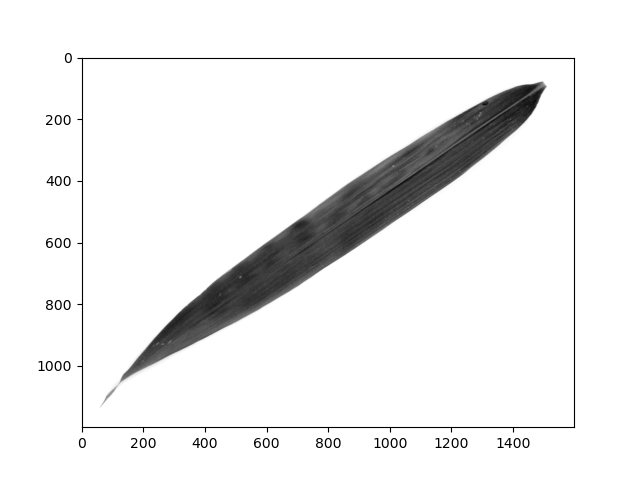

In [81]:
imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
plt.figure()
plt.imshow(imgBlur, cmap='Greys_r')

### Converting to Binary

In [82]:
thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

<IPython.core.display.Javascript object>


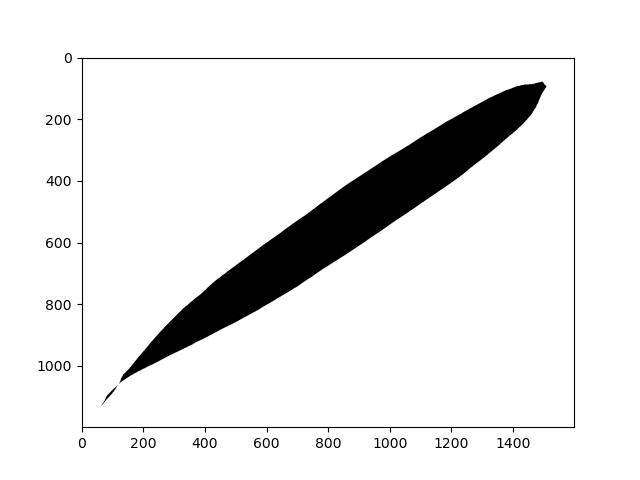

In [83]:
plt.figure()
plt.imshow(imgBW, cmap='Greys_r')

### Image Inversion

<IPython.core.display.Javascript object>


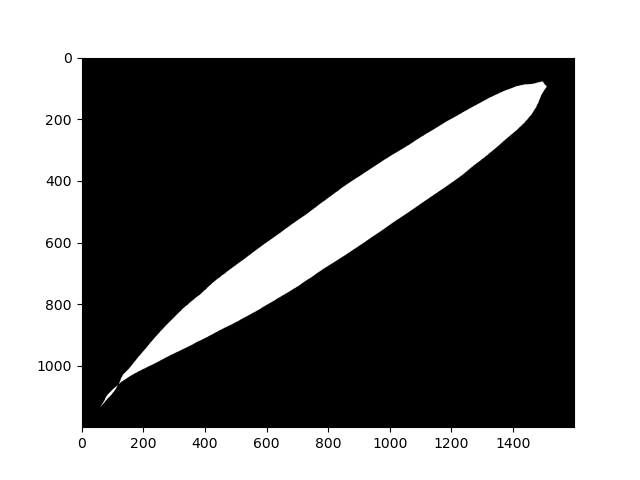

In [84]:
imgInv = cv2.bitwise_not(imgBW)
plt.figure()
plt.imshow(imgInv, cmap='Greys_r')

### Filling Holes


In [85]:
kernel = np.ones((50, 50))
imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)

<IPython.core.display.Javascript object>


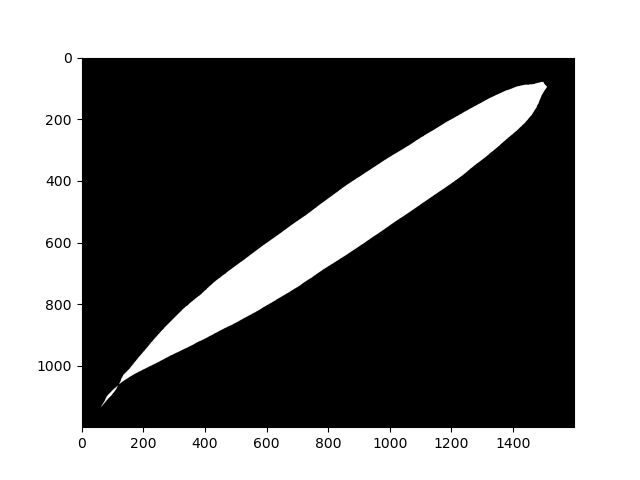

In [86]:
plt.figure()
plt.imshow(imgClosed, cmap='Greys_r')

### Countour Detection

In [87]:
_, contours, _ = cv2.findContours(imgClosed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

<IPython.core.display.Javascript object>


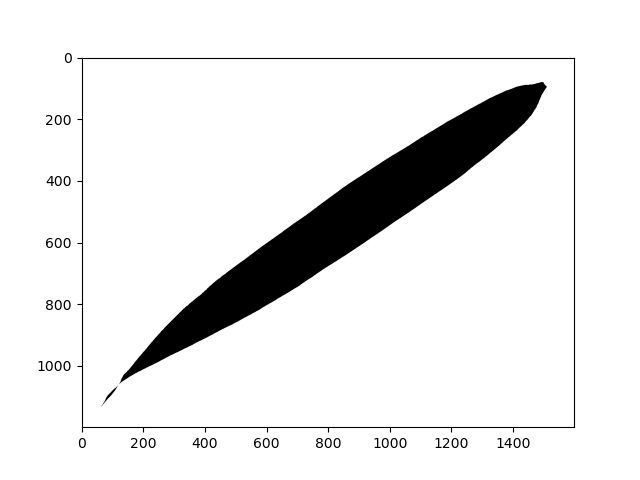

In [88]:
imgCont = cv2.bitwise_not(imgClosed)
plt.figure()
plt.imshow(imgCont, cmap='Greys_r')

In [89]:
len(contours)

3

In [125]:
l = 0
for i in contours:
    if len(i) >l:
        l = len(i)
        cnt = i

cnt

array([[[1490,   81]],

       [[1489,   82]],

       [[1488,   82]],

       ...,

       [[1493,   81]],

       [[1492,   81]],

       [[1491,   81]]], dtype=int32)

### Drawing Contours to Check

In [126]:
imgTest = cv2.drawContours(imgGray, cnt, -1, (0, 255, 0), 3)

<IPython.core.display.Javascript object>


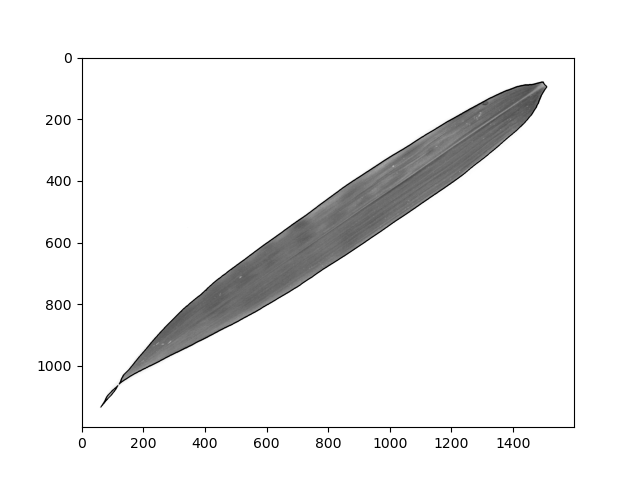

In [127]:
plt.figure()
plt.imshow(imgTest, cmap='Greys_r')

 # Feature Extraction

 ## Colour-Based Features

### Red Channel

In [93]:
red = img.copy()

In [94]:
# Setting Blue and Green Channels to 0
red[:, :, 0] = 0
red[:, :, 1] = 0

In [95]:
cv2.imshow('Red', red)
cv2.waitKey(0)

-1

In [96]:
red_mean = np.mean(red[:, :, 2])

In [97]:
red_mean

229.952371875

In [98]:
red_var = np.std(red[:, :, 2])

In [99]:
red_var

65.76366194642277

### Blue Channel


In [100]:
blue = img.copy()

In [101]:
# Setting Green and Red Channels to 0
blue[:, :, 1] = 0
blue[:, :, 2] = 0

In [102]:
cv2.imshow('Blue', blue)
cv2.waitKey(0)

-1

In [103]:
blue_mean = np.mean(blue[:, :, 0])

In [104]:
blue_mean

227.8115421875

In [105]:
blue_var = np.std(blue[:, :, 0])

In [106]:
blue_var

70.87376339167223

### Green Channel

In [107]:
green = img.copy()

In [108]:
# Setting Blue and Red Channels to 0
green[:, :, 0] = 0
green[:, :, 2] = 0

In [109]:
cv2.imshow('Green', green)
cv2.waitKey(0)

-1

In [111]:
green_mean = np.mean(green[:, :, 1])

In [112]:
green_mean

238.6941765625

In [113]:
green_var = np.std(green[:, :, 1])

In [114]:
green_var

43.259018275143994

 ## Shape-Based Features

### Area

In [128]:
area = cv2.contourArea(cnt)

In [129]:
area

237336.5

### Perimeter

In [130]:
per = cv2.arcLength(cnt, True)

In [131]:
per

3639.5082486867905

### Diameter

In [132]:
dia = 0
for i in range(len(cnt)):
    for j in range(len(cnt)):
        if (i != j):
            temp = np.linalg.norm(cnt[i] - cnt[j])
            if (temp > dia):
                dia = temp

                
dia

KeyboardInterrupt: 

### Finding Bounding Box

<IPython.core.display.Javascript object>


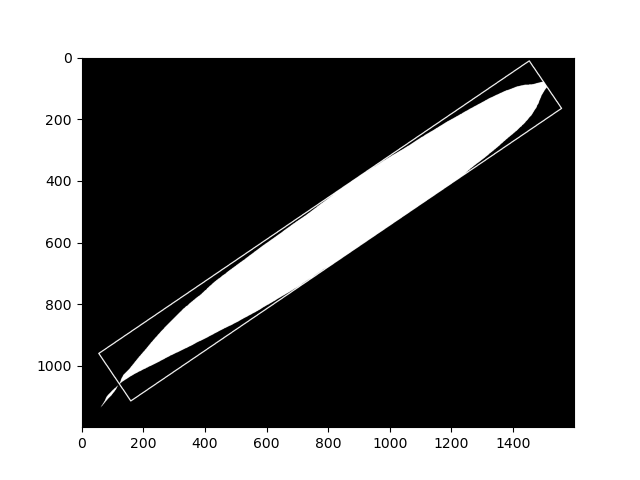

In [133]:
rect = cv2.minAreaRect(cnt)
points = cv2.boxPoints(rect)
points = np.int0(points)
contours_im = cv2.drawContours(imgClosed, [points], 0, (255, 255, 255), 2)
plt.figure()
plt.imshow(contours_im, cmap='Greys_r')

In [134]:
(x, y), (w, h), angle = rect

In [135]:
(w, h)

(1689.0357666015625, 186.77928161621094)

## Morphological Features

### Aspect Ratio

Ratio of Physiological Length to Width

In [136]:
ar = float(h) / w
ar

0.11058337858174645

### Form Factor
Difference between a leaf and a circle

In [137]:
ff = (4 * m.pi * area) / (m.pow(per, 2))
ff

0.22515882910565732

### Rectangularity
How similar a leaf is to a rectangle

In [138]:
rectangularity = (h * w) / area
rectangularity

1.3292388111812805

### Narrow Factor
The narrowness of the leaf

In [139]:
nf = dia / h
nf

9.010815097402483

### Perimeter Ratio of Diameter

Ratio of perimeter of leaf to diameter

In [140]:
pr = per / dia
pr

2.1624691937899705

### Perimeter Ratio of Physiological Length and Physiological Width

Ratio of perimeter of leaf to sum of its physiological length and width

In [141]:
prlw = per / (w + h)
prlw

1.940227663779921

## Texture Based Features

In [142]:
textures = mt.features.haralick(imgGray)

In [143]:
textures  = textures.mean(axis=0)
textures

array([ 7.36161707e-01,  9.87435754e+01,  9.84531173e-01,  3.19156303e+03,
        8.95869417e-01,  4.67027840e+02,  1.26675085e+04,  1.57473391e+00,
        2.03986428e+00,  2.99506072e-03,  1.00112070e+00, -5.67157738e-01,
        8.94764111e-01])

In [144]:
textures.shape

(13,)

In [145]:
contrast = textures[1]
correlation = textures[2]
entropy = textures[8]
idf = textures[4]

In [146]:
contrast

98.74357538425048

In [72]:
correlation

0.982152379384768

In [73]:
entropy

5.853448148787585

In [74]:
idf

0.631175753201125